<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modelo
---





Aqui, criamos um dicionário de têrmos (palavras) sobre a biografia da atriz **Kate Beckinsale**. 

1. A primeira célula obtém o texto da biografia da atriz na variável `texto`. 
2. Na segunda célula cria o dicionário de têrmos com a estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário para confirmar a lei de Zipf


A sua tarefa pode empregar outros textos de seu interesse, inclusive em inglês e outras línguas de mesmas características (francês, alemão, espanhol etc.), e você também pode querer empregar arquivos locais. Existem inúmeros pré- tratamentos possíveis nos dados e diferentes formas de exibir os dados. Para o pré tratamento você pode incluir outras transformações para melhorar a qualidade do seu dicionário. Para exibição dos dados você pode empregar o mesmo código ou buscar uma outra forma de sua preferência.

## Aquisição dos Dados

In [ ]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://rfsampaio.github.io/docs/the_adventures_of_sherlock_holmes_inc.txt'):
    texto.append(line.decode('utf-8'))

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina '
    texto[i] = texto[i].replace('\"','') # elimina "
    texto[i] = texto[i].replace('“','')
    texto[i] = texto[i].replace('”','')
    texto[i] = texto[i].replace('_','')
    


# Construção do Dicionário

In [ ]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
  # print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

# quantidade de palavras no dicionário
# print(len(mydict.keys()))

print(mydict)    

{'\ufeffthe': 1, 'adventures': 1, 'of': 237, 'sherlock': 12, 'holmes': 47, 'by': 32, 'arthur': 1, 'conan': 1, 'doyle': 1, 'i': 258, 'a': 225, 'scandal': 4, 'in': 155, 'bohemia': 8, 'to': 245, 'she': 71, 'is': 86, 'always': 5, 'the': 444, 'woman': 10, 'have': 62, 'seldom': 3, 'heard': 8, 'him': 23, 'mention': 1, 'her': 48, 'under': 8, 'any': 4, 'other': 12, 'name': 6, 'his': 105, 'eyes': 9, 'eclipses': 1, 'and': 253, 'predominates': 1, 'whole': 4, 'sex': 1, 'it': 152, 'was': 123, 'not': 60, 'that': 103, 'he': 108, 'felt': 2, 'emotion': 2, 'akin': 2, 'love': 5, 'for': 46, 'irene': 13, 'adler': 13, 'all': 28, 'emotions': 1, 'one': 27, 'particularly': 2, 'were': 26, 'abhorrent': 1, 'cold': 2, 'precise': 1, 'but': 53, 'admirably': 2, 'balanced': 1, 'mind': 6, 'take': 7, 'most': 11, 'perfect': 1, 'reasoning': 3, 'observing': 2, 'machine': 1, 'world': 1, 'has': 21, 'seen': 8, 'as': 60, 'lover': 1, 'would': 20, 'placed': 1, 'himself': 5, 'false': 3, 'position': 2, 'never': 6, 'spoke': 3, 'soft

# Exibição dos Resultados

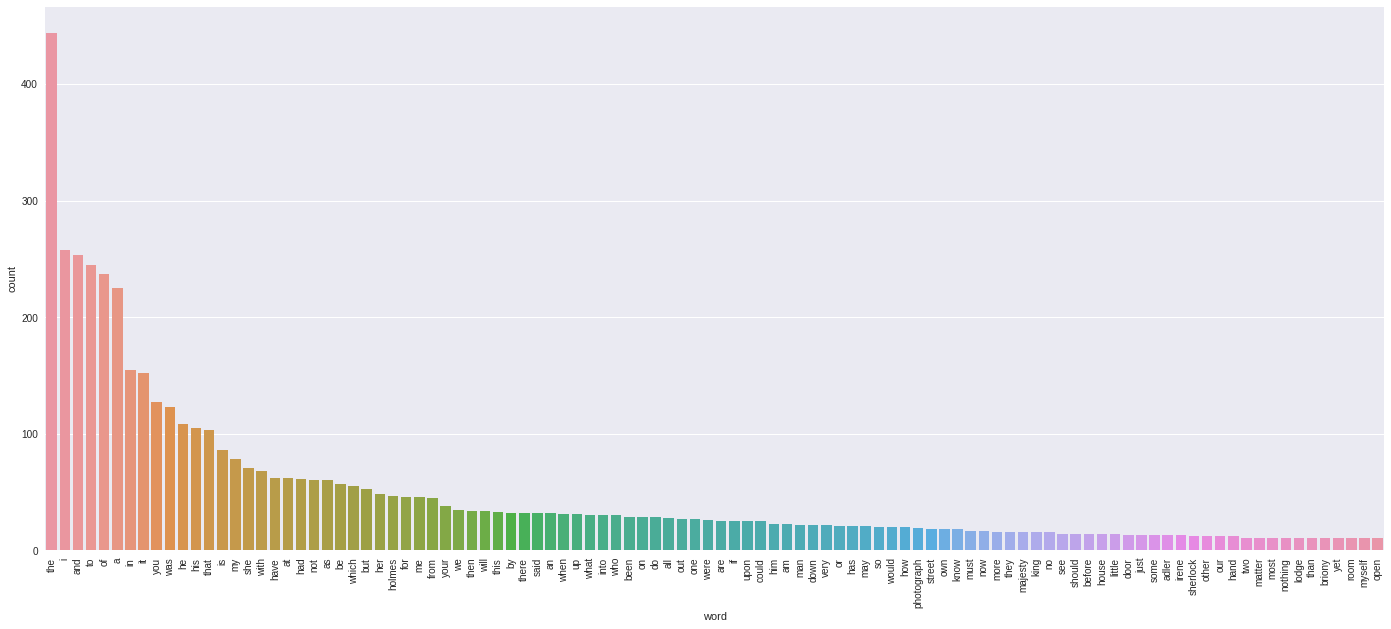

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 10] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()